#Sales Analysis Project

##### Import the required Library

In [121]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### Connect the data from drive

In [122]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


##### Merge 12 months of sales data into a single csv file 

In [123]:
files =[file for file in os.listdir('/content/gdrive/My Drive/Sales_Data')]
for file in files:
    print(file)

Sales_October_2019.csv
Sales_March_2019.csv
Sales_January_2019.csv
Sales_May_2019.csv
Sales_September_2019.csv
Sales_November_2019.csv
Sales_December_2019.csv
Sales_August_2019.csv
Sales_February_2019.csv
Sales_April_2019.csv
Sales_June_2019.csv
Sales_July_2019.csv
all_data.csv


In [124]:
path = "/content/gdrive/My Drive/Sales_Data"

#create a blank dataframe
all_data = pd.DataFrame()

for file in files:
    current_df = pd.read_csv(path+"/"+file)
    all_data = pd.concat([all_data, current_df])
    
all_data.shape

(1121100, 6)

##### convert the merged data into dataset

In [125]:
all_data.to_csv("/content/gdrive/My Drive/Sales_Data/all_data.csv",index=False)

#all_data.to_csv('F:/EDA_projects/Sales_Analysis/SalesAnalysis/Sales_Data/all_data.csv',index=False)

##### Data cleaning and formatting

In [126]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [127]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001"
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001"
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001"
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001"
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001"


In [128]:
all_data.isnull().sum()

Order ID            3270
Product             3270
Quantity Ordered    3270
Price Each          3270
Order Date          3270
Purchase Address    3270
dtype: int64

In [129]:
all_data = all_data.dropna(how='all')
all_data.shape

(1117830, 6)

##### What is the best month for sale?

In [130]:
#exporting the month number
'04/19/19 08:46'.split('/')[0]

'04'

In [131]:
#exporting the month number for the complete dataset
def month(x):
    return x.split('/')[0]

##### Add month collumn

In [132]:
all_data['Month']=all_data['Order Date'].apply(month)

In [133]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month               object
dtype: object

In [134]:
all_data['Month'].unique()

array(['10', 'Order Date', '11', '03', '04', '01', '02', '05', '06', '09',
       '12', '08', '07'], dtype=object)

In [135]:
filter=all_data['Month']=='Order Date'
len(all_data[~filter])

1115700

In [136]:
all_data=all_data[~filter]

In [137]:
all_data.shape

(1115700, 7)

In [138]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001",10
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001",10
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001",10
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001",10
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001",10


In [139]:
all_data['Month']=all_data['Month'].astype(int)

In [140]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int64
dtype: object

In [141]:
all_data['Price Each']=all_data['Price Each'].astype(float)

In [142]:
all_data['Quantity Ordered']=all_data['Quantity Ordered'].astype(int)

In [143]:
all_data['sales']=all_data['Quantity Ordered']*all_data['Price Each']
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001",10,379.99
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001",10,389.99
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001",10,5.98
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001",10,149.99
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001",10,11.99


In [144]:
all_data.groupby('Month')['sales'].sum()

Month
1     1.093354e+07
2     1.321213e+07
3     1.684260e+07
4     2.034402e+07
5     1.891564e+07
6     1.546681e+07
7     1.588665e+07
8     1.346681e+07
9     1.258536e+07
10    2.242036e+07
11    1.919762e+07
12    2.768066e+07
Name: sales, dtype: float64

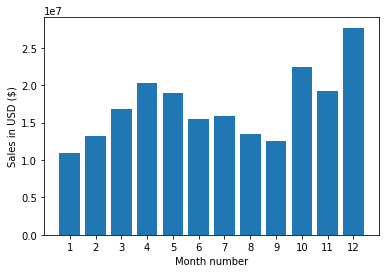

In [145]:
months=range(1,13)
plt.bar(months,all_data.groupby('Month')['sales'].sum())
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

##### Which city has max order

In [146]:
#code to pull city name from address
'917 1st St, Dallas, TX 75001'.split(',')[1]

' Dallas'

In [147]:
# functional code to pull city name from address

def city(x):
    return x.split(',')[1]

In [148]:
all_data['city']=all_data['Purchase Address'].apply(city)

In [149]:
all_data.groupby('city')['city'].count()

city
 Atlanta           89286
 Austin            59430
 Boston           119604
 Dallas            88920
 Los Angeles      177630
 New York City    149256
 Portland          74790
 San Francisco    268392
 Seattle           88392
Name: city, dtype: int64

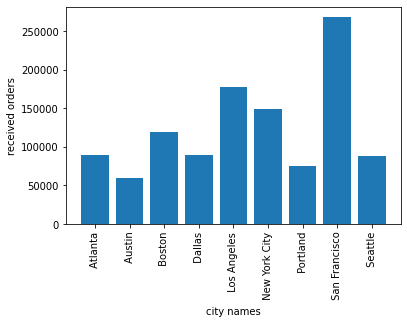

In [150]:
plt.bar(all_data.groupby('city')['city'].count().index,all_data.groupby('city')['city'].count())
plt.xticks(rotation='vertical')
plt.ylabel('received orders')
plt.xlabel('city names')
plt.show()

##### What time should we display advertisements to maximise for product purchase?

In [151]:
all_data['Order Date'][0].dtype

dtype('O')

In [152]:
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour

In [153]:
keys=[]
hour=[]
for key,hour_df in all_data.groupby('Hour'):
    keys.append(key)
    hour.append(len(hour_df))

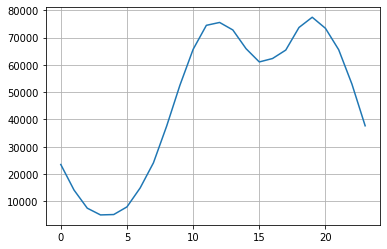

In [154]:
plt.grid()
plt.plot(keys,hour)

##### between 12pm and 7pm is probably the best time to advertise to maximise product purchase

#### What product sold the most? &  Why?

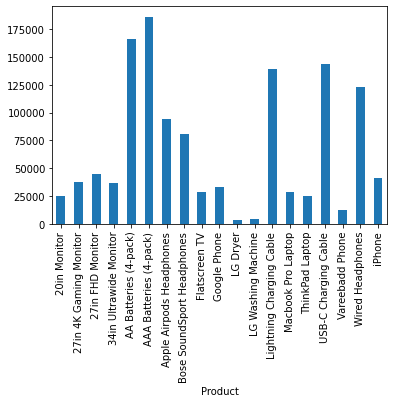

In [155]:
all_data.groupby('Product')['Quantity Ordered'].sum().plot(kind='bar')

In [156]:
all_data.groupby('Product')['Price Each'].mean()

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

In [157]:
products=all_data.groupby('Product')['Quantity Ordered'].sum().index
quantity=all_data.groupby('Product')['Quantity Ordered'].sum()
prices=all_data.groupby('Product')['Price Each'].mean()

[Text(0, 0, '20in Monitor'),
 Text(0, 0, '27in 4K Gaming Monitor'),
 Text(0, 0, '27in FHD Monitor'),
 Text(0, 0, '34in Ultrawide Monitor'),
 Text(0, 0, 'AA Batteries (4-pack)'),
 Text(0, 0, 'AAA Batteries (4-pack)'),
 Text(0, 0, 'Apple Airpods Headphones'),
 Text(0, 0, 'Bose SoundSport Headphones'),
 Text(0, 0, 'Flatscreen TV'),
 Text(0, 0, 'Google Phone'),
 Text(0, 0, 'LG Dryer'),
 Text(0, 0, 'LG Washing Machine'),
 Text(0, 0, 'Lightning Charging Cable'),
 Text(0, 0, 'Macbook Pro Laptop'),
 Text(0, 0, 'ThinkPad Laptop'),
 Text(0, 0, 'USB-C Charging Cable'),
 Text(0, 0, 'Vareebadd Phone'),
 Text(0, 0, 'Wired Headphones'),
 Text(0, 0, 'iPhone')]

<Figure size 2880x1728 with 0 Axes>

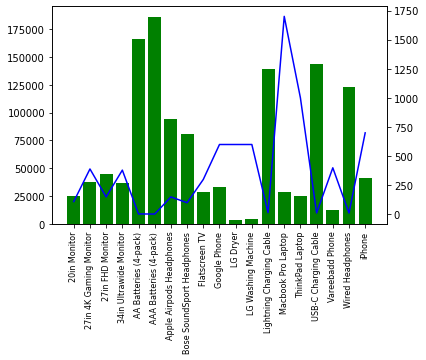

In [158]:
plt.figure(figsize=(40,24))
fig,ax1 = plt.subplots()
ax2=ax1.twinx()
ax1.bar(products, quantity, color='g')
ax2.plot(products, prices, 'b-')
ax1.set_xticklabels(products, rotation='vertical', size=8)

##### The top selling product is 'AAA Batteries'. The top selling products seem to have a correlation with the price of the product. The cheaper the product higher the quantity ordered and vice versa.

In [159]:
all_data.shape

(1115700, 10)

##### What products are most often sold together?

#### note: keep orders that have same order Id,are sold mostly together

In [160]:
df=all_data[all_data['Order ID'].duplicated(keep=False)]
df.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city,Hour
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001",10,379.99,Dallas,10
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001",10,389.99,Los Angeles,17
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001",10,5.98,New York City,17
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001",10,149.99,New York City,22
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001",10,11.99,Los Angeles,16
5,259363,AAA Batteries (4-pack),1,2.99,10/01/19 18:55,"976 Lake St, New York City, NY 10001",10,2.99,New York City,18
6,259364,Wired Headphones,1,11.99,10/29/19 11:02,"874 North St, Los Angeles, CA 90001",10,11.99,Los Angeles,11
7,259365,Lightning Charging Cable,1,14.95,10/29/19 11:19,"127 12th St, Los Angeles, CA 90001",10,14.95,Los Angeles,11
8,259366,Apple Airpods Headphones,1,150.00,10/20/19 11:52,"955 9th St, Los Angeles, CA 90001",10,150.00,Los Angeles,11
9,259367,Apple Airpods Headphones,1,150.00,10/16/19 16:19,"742 14th St, San Francisco, CA 94016",10,150.00,San Francisco,16


In [161]:
#create grouped col 
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

In [162]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city,Hour,Grouped
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001",10,379.99,Dallas,10,"34in Ultrawide Monitor,34in Ultrawide Monitor,..."
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001",10,389.99,Los Angeles,17,"27in 4K Gaming Monitor,27in 4K Gaming Monitor,..."
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001",10,5.98,New York City,17,"AAA Batteries (4-pack),AAA Batteries (4-pack),..."
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001",10,149.99,New York City,22,"27in FHD Monitor,27in FHD Monitor,27in FHD Mon..."
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001",10,11.99,Los Angeles,16,"Wired Headphones,Wired Headphones,Wired Headph..."


In [163]:
df.shape

(1115700, 11)

In [164]:
#lets drop out all duplicate Order ID
df2 = df.drop_duplicates(subset=['Order ID'])

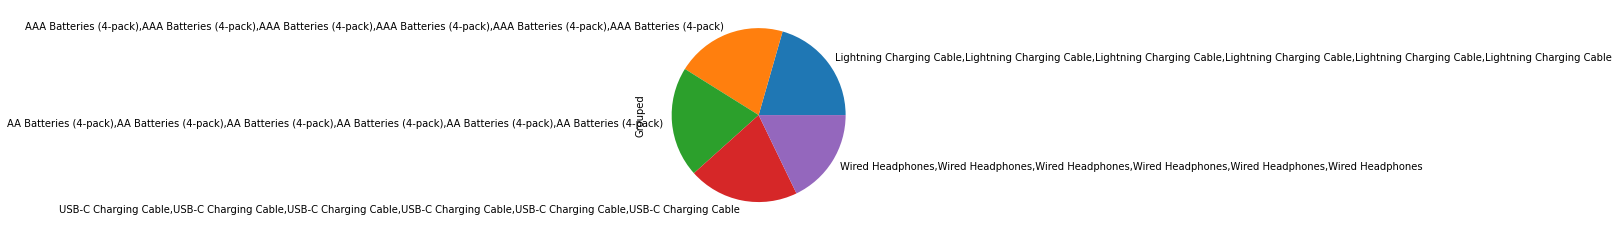

In [170]:
df2['Grouped'].value_counts()[0:5].plot.pie()

In [171]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [172]:
values=df2['Grouped'].value_counts()[0:5]
labels=df['Grouped'].value_counts()[0:5].index

In [173]:
trace=go.Pie(labels=labels, values=values,
               hoverinfo='label+percent', textinfo='value', 
               textfont=dict(size=25),
              pull=[0, 0, 0,0.2, 0]
               )

In [174]:
iplot([trace])